# CNN

-------
## Importation des libraires

In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Lecture des données

In [122]:
# Charger le DataFrame initial et les nouvelles valeurs
dataset = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
new_values = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['New_Class'], delimiter='\s+')
dataset['Class'] = new_values['New_Class']
dataset.head(len(dataset))

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.0,345.489585,465.024867,353.379868,679.766033,0.199611,1.172721
1,0.0,297.938838,238.719070,1180.971365,1441.838840,0.233832,0.871765
2,0.0,375.341165,439.139407,1028.171307,2469.411191,0.266850,0.786855
3,0.0,304.508444,594.597040,1049.210472,1477.424605,0.298691,0.852576
4,0.0,94.237243,73.547132,396.930317,669.509993,0.329382,0.856799
...,...,...,...,...,...,...,...
12805,0.0,255.291245,69.638338,58.645717,248.293827,1.683803,1.334752
12806,0.0,280.984170,22.588877,97.207134,97.334776,1.742832,1.388819
12807,0.0,124.216958,91.341961,56.843374,493.068512,1.803927,1.363538
12808,0.0,143.469790,41.622062,86.254182,290.279950,1.867127,1.278275


## Concatenation des 2 datas


In [105]:
# Chargement des jeux de données
dataset_e1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
dataset_e2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')

In [107]:
# Supposition que la première colonne est la cible pour les deux datasets
# Combinaison des deux jeux de données
dataset = pd.concat([dataset_e1, dataset_e2], axis=0)

new_values = pd.read_csv("y2_e1.txt", header=None, names=['New_Class'], delimiter='\s+')
dataset['Class'] = new_values['New_Class']

## Next step

In [123]:
# Séparation des données en ensembles de fonctionnalités et variable cible
X = dataset.iloc[:, 1:5].values  # Ajuster les indices selon votre configuration des données
y = dataset['Class'].values

In [124]:
# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

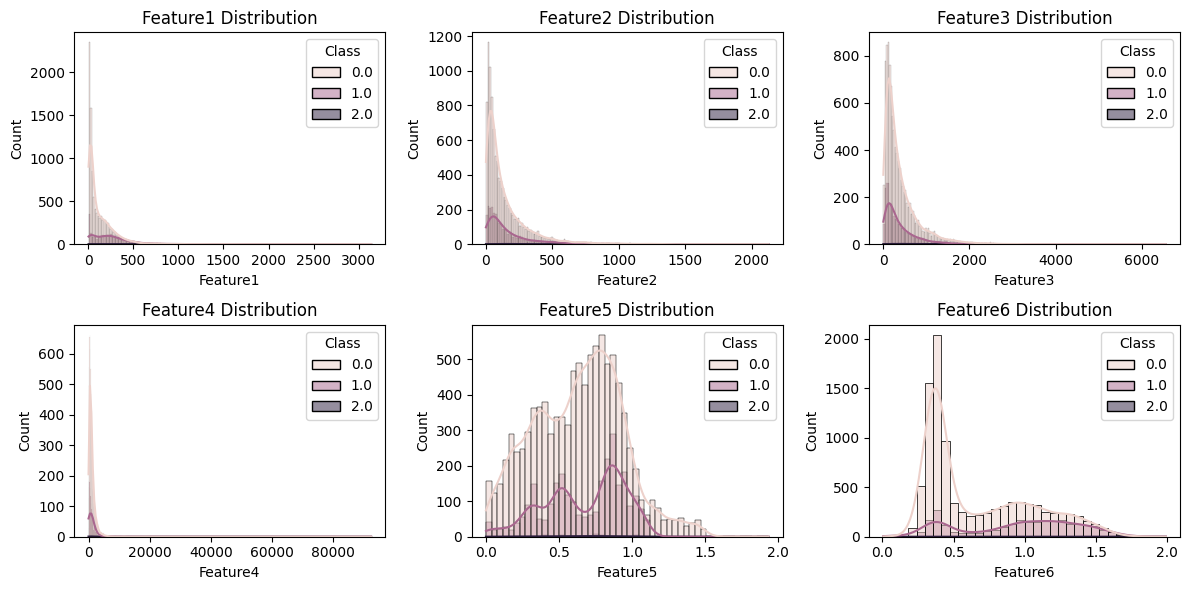

In [125]:
# Visualisation de la distribution de chaque caractéristique
plt.figure(figsize=(12, 6))
for i, feature in enumerate(dataset.columns[1:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=dataset, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

In [126]:
dataset.iloc[:,1:].describe()
# Basic statistics :
# Ces statistiques fournissent un aperçu de la distribution des données, notamment des mesures centrales, de la dispersion et des valeurs extrêmes.

# Count :
# Permet de vérifier si certaines colonnes ont des valeurs manquantes.
# Mean (moyenne) :
# Donne une idée de la tendance centrale des données.
# Std (écart type) :
# Mesure la dispersion des données autour de la moyenne. Une valeur élevée indique une dispersion importante.
# Min et Max :
# Délimitent la plage des valeurs observées.
# 25%, 50%, 75% (quartiles) :
# Indiquent la répartition des données. La médiane (50%) est la valeur qui divise les données en deux moitiés égales. Les quartiles aident à comprendre la dispersion des valeurs.

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
count,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000
mean,151.458379,149.920651,400.832644,1220.819676,0.639482,0.726567
std,184.579004,182.028546,427.800726,2480.911004,0.298768,0.402594
min,1.076040,0.955428,3.392103,7.449574,0.000000,0.006647
25%,22.237794,36.183844,125.107625,436.950244,0.407409,0.373925
50%,83.545856,84.392938,255.556014,768.661462,0.664452,0.567246
75%,223.109187,191.940735,518.183014,1335.058697,0.859794,1.063505
max,3139.233639,2126.014583,6557.959843,92455.135460,1.932471,1.990678


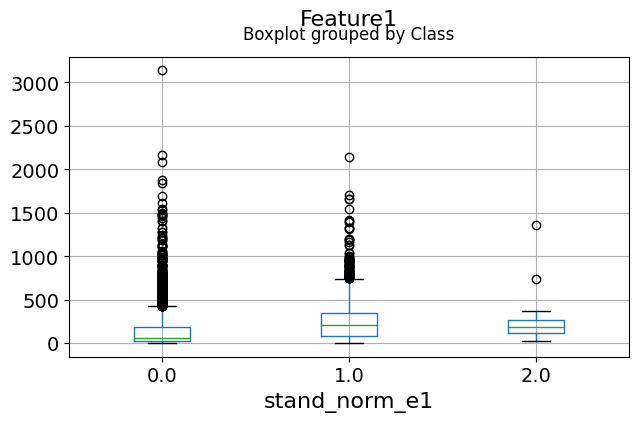

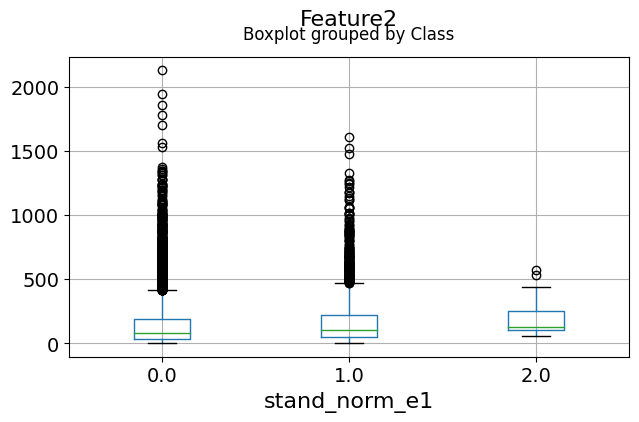

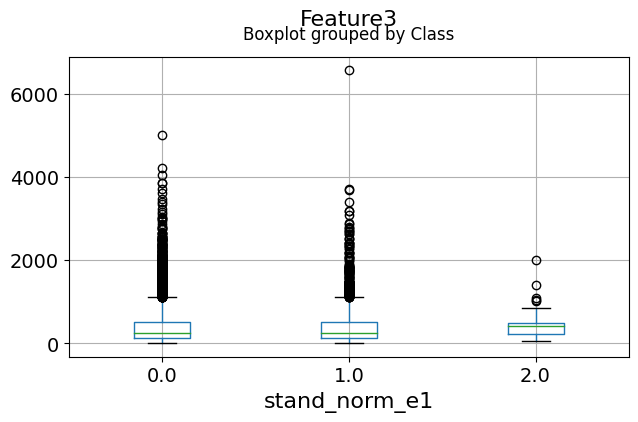

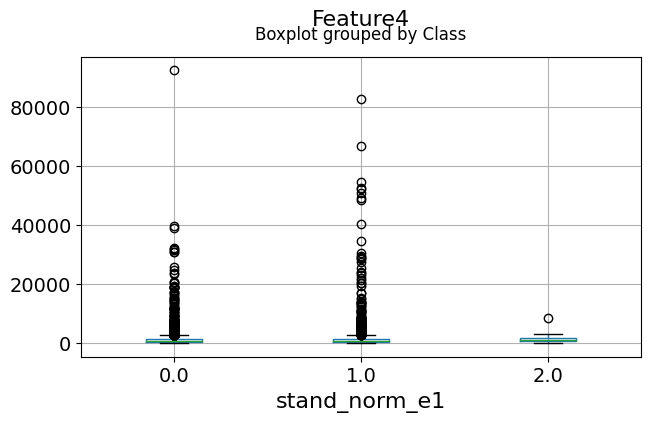

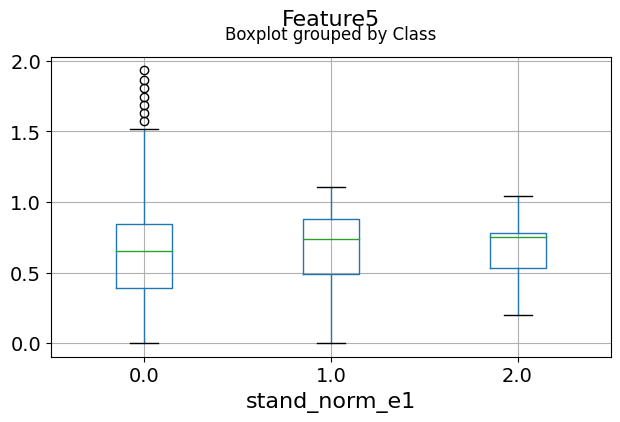

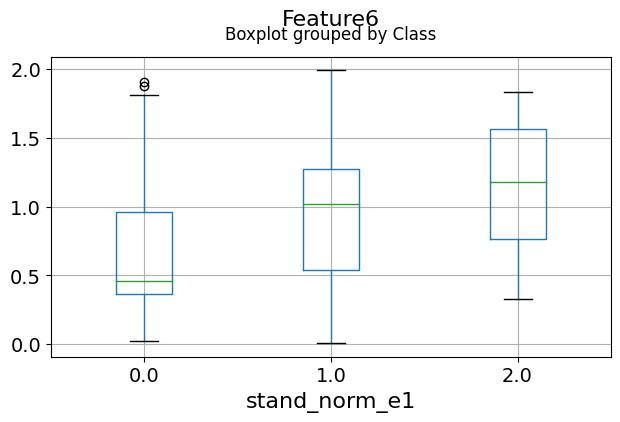

In [127]:
for c in dataset.columns[1:]:
    dataset.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("stand_norm_e1", fontsize=16)

## Correlation heatmaps

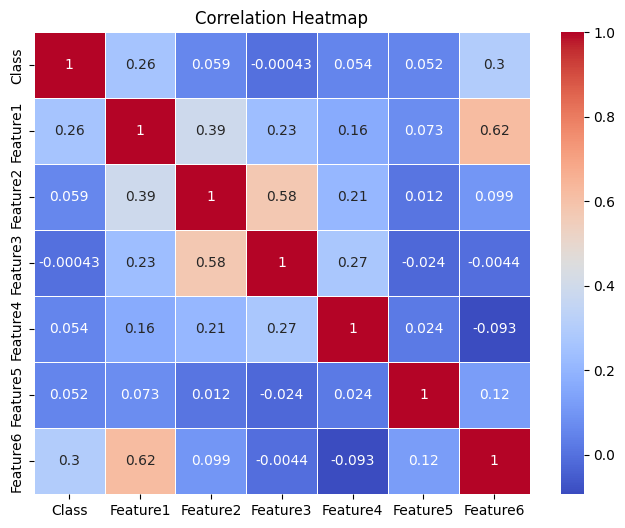

In [128]:
# Calculating the correlation matrix
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Séparation des Données en Ensembles d'Apprentissage et de Test

In [129]:
# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Remodele les entrées pour les CNN: (nombre d'échantillons, nombre de pas de temps, nombre de caractéristiques par pas)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Construction du modèle CNN


In [130]:
model = Sequential()
# Augmenter la taille de l'input si nécessaire ou ajuster les paramètres
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
# Ajout d'une seconde couche convolutive avec padding pour conserver la dimension
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [131]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])

In [132]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
513/513 [==============================] - 3s 3ms/step - loss: 2.7273 - Accuracy: 0.7430
Epoch 2/20
513/513 [==============================] - 2s 3ms/step - loss: 0.6388 - Accuracy: 0.7797
Epoch 3/20
513/513 [==============================] - 2s 3ms/step - loss: 0.6010 - Accuracy: 0.7797
Epoch 4/20
513/513 [==============================] - 2s 3ms/step - loss: 0.5846 - Accuracy: 0.7782
Epoch 5/20
513/513 [==============================] - 2s 3ms/step - loss: 0.5923 - Accuracy: 0.7772
Epoch 6/20
513/513 [==============================] - 2s 3ms/step - loss: 0.5564 - Accuracy: 0.7807
Epoch 7/20
513/513 [==============================] - 2s 4ms/step - loss: 0.5500 - Accuracy: 0.7805
Epoch 8/20
513/513 [==============================] - 2s 5ms/step - loss: 0.5464 - Accuracy: 0.7796
Epoch 9/20
513/513 [==============================] - 2s 3ms/step - loss: 0.5464 - Accuracy: 0.7790
Epoch 10/20
513/513 [==============================] - 2s 3ms/step - loss: 0.5482 - Accuracy: 0.7805

In [133]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 78.84%


In [134]:
# Prédictions
y_pred = model.predict(X_test)

81/81 [==============================] - 0s 2ms/step


Documentation :

https://www.kaggle.com/code/sabinem/geometry-of-epilepsy-detection/notebook

https://iopscience.iop.org/article/10.1088/1741-2552/ab260c